### Notes: 
#### Problems with the values:
- D06 B00_Alt 0 (has 0 performance)
- veery slow performances
- and veeery fast ones
- what do we do with space? is that tested? Check: Do I include it in optimization?
- average nonshifted quite high (assigned to all with space, 600ms)


In [2]:
from read_input import *
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
%matplotlib inline
set_scenario_files("scenario3")


keyslots = get_keyslots()
characters = get_characters()

C:\Users\feita1\Python_Anaconda\lib\site-packages\matplotlib\__init__.py:872: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


In [3]:
performance = pd.read_csv("input/performance_daryl.csv", sep=" ", names={"key1", "key2", "time"})
performance = performance[["key1", "key2", "time"]]
p_single, p_bigram = get_probabilities({"formal":0.5, "twitter":0.3, "code":0.2})
p_single_df = pd.DataFrame(columns={"letter" "f"})
p_single_df.loc[:,"letter"] = [l for l, f in p_single.iteritems()]
p_single_df.loc[:,"f"] = [f for l, f in p_single.iteritems()]

p_bigram_df = pd.DataFrame(columns={"letter1", "letter2", "f"})
p_bigram_df.loc[:,"letter1"] = [l1 for (l1,l2), f in p_bigram.iteritems()]
p_bigram_df.loc[:,"letter2"] = [l2 for (l1,l2), f in p_bigram.iteritems()]
p_bigram_df.loc[:,"f"] = [f for (l1,l2), f in p_bigram.iteritems()]
p_bigram_df = p_bigram_df[["letter1", "letter2", "f"]]
p_bigram_df = p_bigram_df[(p_bigram_df.letter1.isin(characters)) | (p_bigram_df.letter2.isin(characters))]

weighting corpora
weighting corpora
weighting corpora


In [6]:

def group(key1,key2=""):
    keyslots=get_keyslots()
    if key1 in keyslots:
        parts =  key1.split("_")
        if len(parts)>1:
            return "_".join(parts[1:])
        else:
            return "Normal"
    else:
        parts =  key2.split("_")
        if len(parts)>1:
            return "_".join(parts[1:])
        else:
            return "Normal"
        
performance.loc[:,"Group"] = performance.apply(lambda row: group(row.key1, row.key2), axis=1)
performance.loc[:,"Fst"] = performance.key1.apply(lambda x: x in keyslots)

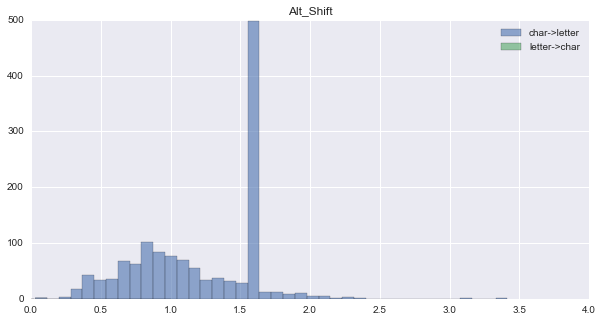

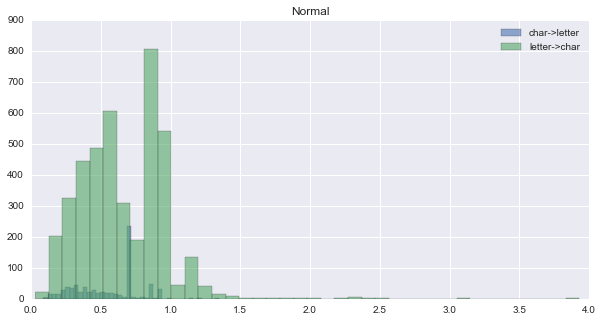

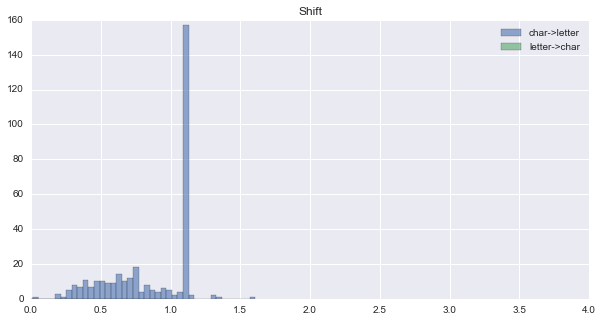

In [7]:

#plt.legend(["Normal", "Shift", "Alt", "Alt_Shift"])
#df = performance[performance.Fst==False]
for g, g_data in performance.groupby('Group'):
    fig,ax = plt.subplots(1)
    fig.set_size_inches(10,5)
    g_data[g_data.Fst==True].time.hist(bins=40,ax=ax,alpha=0.6)
    g_data[g_data.Fst==False].time.hist(bins=40,ax=ax,alpha=0.6)
    ax.legend(["char->letter", "letter->char"])
    ax.set_xlim(0,4.0)
    plt.title(g)


In [11]:
performance[performance.key1 == "E03"].sort_values(by="time")
#performance.sort_values(by="time")

key1 key2     time  Group1   Fst   Group
172   E03  D06  0.17400  Normal  True  Normal
186   E03  C03  0.26400  Normal  True  Normal
178   E03  D09  0.27900  Normal  True  Normal
170   E03  D05  0.29100  Normal  True  Normal
176   E03  D08  0.30600  Normal  True  Normal
162   E03  D01  0.30900  Normal  True  Normal
208   E03  B05  0.31800  Normal  True  Normal
210   E03  B06  0.32700  Normal  True  Normal
182   E03  C01  0.34500  Normal  True  Normal
206   E03  B04  0.39000  Normal  True  Normal
200   E03  B01  0.39300  Normal  True  Normal
202   E03  B02  0.39600  Normal  True  Normal
180   E03  D10  0.39600  Normal  True  Normal
166   E03  D03  0.40800  Normal  True  Normal
174   E03  D07  0.45000  Normal  True  Normal
194   E03  C07  0.46500  Normal  True  Normal
204   E03  B03  0.49800  Normal  True  Normal
196   E03  C08  0.51600  Normal  True  Normal
184   E03  C02  0.56100  Normal  True  Normal
212   E03  B07  0.70214  Normal  True  Normal
188   E03  C04  0.70214  Normal  True  Normal
192   E03  C06  0.70214  Normal  True  Normal
190   E03  C05  0.70214  Normal  True  Normal
214   E03  A03  0.70214  Normal  True  Normal
168   E03  D04  0.70214  Normal  True  Normal
164   E03  D02  0.70214  Normal  True  Normal
198   E03  C09  0.70214  Normal  True  Normal
7674  E03  C10  0.70214  Normal  True  Normal

In [9]:
p_bigram_df.sort_values(by="f", ascending=False)

letter1 letter2         f
18863       ,   space  0.007985
5837        t       .  0.004010
10498       .       c  0.003807
17312       /       t  0.003508
1348        /       /  0.003472
2507        :       /  0.003466
999         o       /  0.003440
10128   space       #  0.003357
9027        s       :  0.003081
19364       à   space  0.002545
10985       :   space  0.002430
4594    space       à  0.002341
20362       .   space  0.002339
13396      /d   space  0.002295
12067       t       é  0.002253
7129        é   space  0.002186
12266       r       é  0.002155
12065   space       @  0.001939
11920       e       ,  0.001627
555         e      ^d  0.001618
16728       =   space  0.001572
4088        é       s  0.001563
10895   space      ,d  0.001538
517         .       .  0.001537
7019        )   space  0.001507
17512       é       e  0.001504
15122       d       é  0.001446
9355        s       ,  0.001443
15315   space       =  0.001405
9687    space       (  0.001396
...       ...     ...       ...
9060        ŋ       ¤  0.000000
9107        †       z  0.000000
9063        É      ˉd  0.000000
9064        ”       Œ  0.000000
9066        É      ^d  0.000000
9069        È       %  0.000000
9070        ₩       g  0.000000
9071        ¾       ª  0.000000
9074        =      ˇd  0.000000
9079       ´d       ≠  0.000000
9080        r      ˉd  0.000000
9081        r      -d  0.000000
9082       /d       g  0.000000
9083        _       ›  0.000000
9084       °d       ‘  0.000000
9085        h       ₩  0.000000
9086       _d       ª  0.000000
9087        >       Ǝ  0.000000
9088        ǝ       ¢  0.000000
9090        ç      θ2  0.000000
9091        c       ¼  0.000000
9092       ˉd       >  0.000000
9093        .      ̑d  0.000000
9094       ˵d       -  0.000000
9098       ,d      ˘d  0.000000
9099        Ç       n  0.000000
9102       θ2       e  0.000000
9104        É       Ŋ  0.000000
9106        g       Ŋ  0.000000
21903       Ĳ       k  0.000000

[21175 rows x 3 columns]

In [138]:
p_single_df[["letter", "f"]].sort_values(by="f", ascending=False).reset_index(drop=True)

letter             f
0    space  1.721557e-01
1        e  1.004127e-01
2        t  6.316855e-02
3        s  5.722812e-02
4        a  5.477557e-02
5        i  5.350245e-02
6        n  5.209126e-02
7        r  5.145596e-02
8        o  4.838453e-02
9        u  3.832550e-02
10       l  3.678060e-02
11       c  2.846459e-02
12       d  2.775302e-02
13       p  2.387900e-02
14       m  2.026164e-02
15       é  1.304321e-02
16       .  1.256826e-02
17       h  1.168534e-02
18       v  1.101483e-02
19       f  1.088810e-02
20       /  1.021845e-02
21       g  9.351838e-03
22       ,  8.362057e-03
23       b  8.031958e-03
24       :  6.655375e-03
25       q  5.596464e-03
26       )  4.406723e-03
27       (  4.231984e-03
28       y  4.212485e-03
29       -  4.184177e-03
..     ...           ...
118      þ  3.549590e-08
119      Þ  3.407104e-08
120      ¢  3.292534e-08
121      ÷  2.970456e-08
122      ¾  2.800661e-08
123      ≥  2.695412e-08
124     _d  2.140077e-08
125      ¼  1.939003e-08
126      ‡  1.827366e-08
127      ŋ  1.467600e-08
128      √  1.453870e-08
129      ¥  1.117512e-08
130      ≠  1.088543e-08
131      ‚  9.592778e-09
132      ſ  8.822806e-09
133      Ð  7.737564e-09
134      ʒ  4.996145e-09
135      ≃  1.699207e-09
136      Ŋ  1.416006e-09
137      Ǝ  1.187267e-09
138     ˵d  1.121912e-09
139      ĳ  1.089235e-09
140     ̑d  9.803118e-10
141     -d  6.276747e-10
142      Ĳ  5.881871e-10
143      ₩  3.158783e-10
144      Ʒ  2.069547e-10
145      ẞ  1.416006e-10
146     /d  1.089235e-10
147     θ2  0.000000e+00

[148 rows x 2 columns]

In [143]:
p_single_df = p_single_df[["letter", "f"]]
p_single_df[p_single_df.letter.isin(characters)].sort_values(by="f", ascending=False).reset_index(drop=True).to_csv("characters_ordered.txt", encoding="utf-8", sep="\t")